### PARTE 1:
1- Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

2- Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

3- Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

### Algoritmo coordenadas cromaticas

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

# funcion para transformar a coordenadas cromaticas
def get_chrom_coord(imgRGB: np.ndarray):
        im_r, im_g, im_b = cv.split(imgRGB)
        sum_rgb= im_r.astype('float64') + im_g.astype('float64') + im_b.astype('float64')
        #red_channel, green_channel, blue_channel = cv.split(rgb_image)
    
        chrom_r=np.divide(im_r, sum_rgb, where=(sum_rgb != 0))
        chrom_g=np.divide(im_g, sum_rgb, where=(sum_rgb != 0))
        chrom_b=np.divide(im_b, sum_rgb, where=(sum_rgb != 0))
        imgChromf= cv.merge((chrom_r,chrom_g,chrom_b))
        imgChrom = (255 * imgChromf).round().astype(np.uint8) 
        return imgChrom

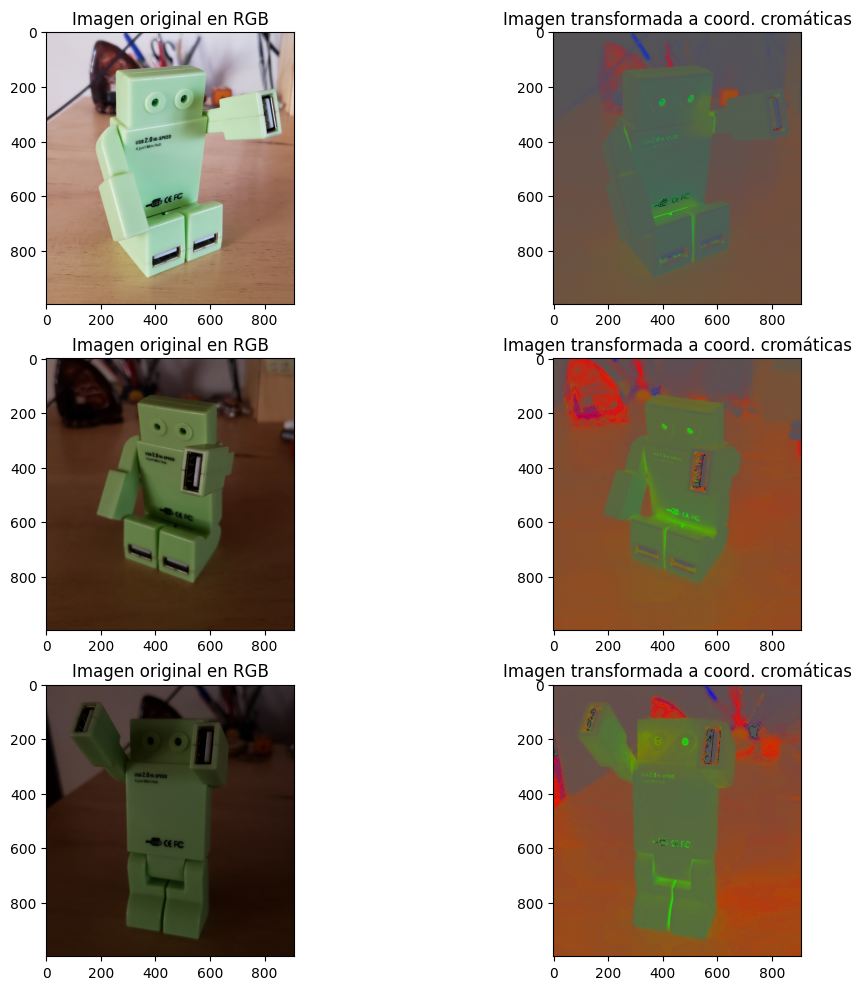

In [2]:
img_TP = ['CoordCrom_1.png','CoordCrom_2.png','CoordCrom_3.png']
fig, ax = plt.subplots(len(img_TP),2, figsize=(12,12))

for var in range(len(img_TP)):
    path_img='./coord_cromaticas/' + img_TP[var]
    imgBGR = cv.imread(path_img)
    imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
    imgCHROM = get_chrom_coord(imgRGB)
    
    ax[var][0].imshow(imgRGB)
    ax[var][0].set_title('Imagen original en RGB')

    ax[var][1].imshow(imgCHROM)
    ax[var][1].set_title('Imagen transformada a coord. cromáticas')

### Algoritmo White Patch

In [3]:
def get_white_patch(imgRGB: np.ndarray):
        im_r, im_g, im_b = cv.split(imgRGB) 
        Rmax=np.amax(im_r)
        Gmax=np.amax(im_g)
        Bmax=np.amax(im_b)

        valR=(255/Rmax) * im_r.astype(np.float32)
        valG=(255/Gmax) * im_g.astype(np.float32)
        valB=(255/Bmax) * im_b.astype(np.float32)
        imgWP= cv.merge((valR,valG,valB))
        wh_pt_final= np.clip(imgWP, 0, 255).astype(np.uint8) 
   
        return wh_pt_final

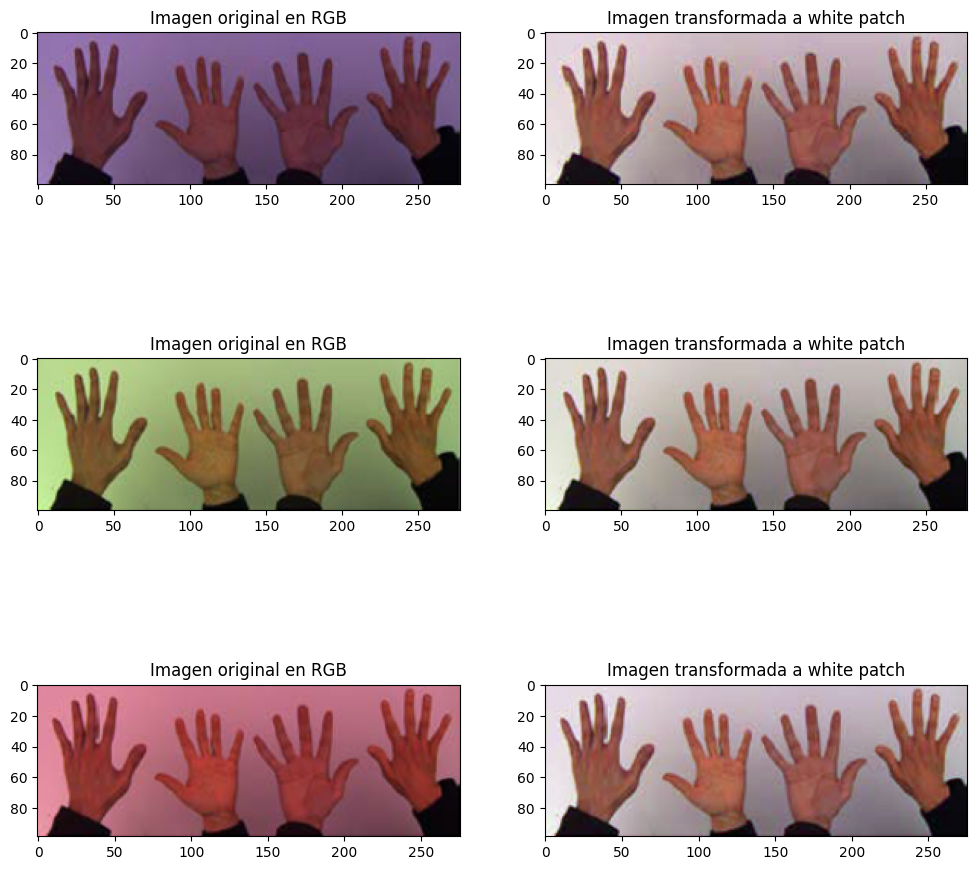

In [4]:
img_TP = ['test_blue.png','test_green.png','test_red.png']
fig, ax = plt.subplots(len(img_TP),2, figsize=(12,12))

for var in range(len(img_TP)):
    path_img='./white_patch/' + img_TP[var]
    imgBGR = cv.imread(path_img)
    imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
    imgCHROM = get_white_patch(imgRGB)
    
    ax[var][0].imshow(imgRGB)
    ax[var][0].set_title('Imagen original en RGB')

    ax[var][1].imshow(imgCHROM)
    ax[var][1].set_title('Imagen transformada a white patch')

Se observa que el resultado del algortimo sobre las 3 imagenes da como resultado una imagen similar lo cual valida que puede ayudar a encontrar una imagen que no le afecten los cambios de iluminacion.

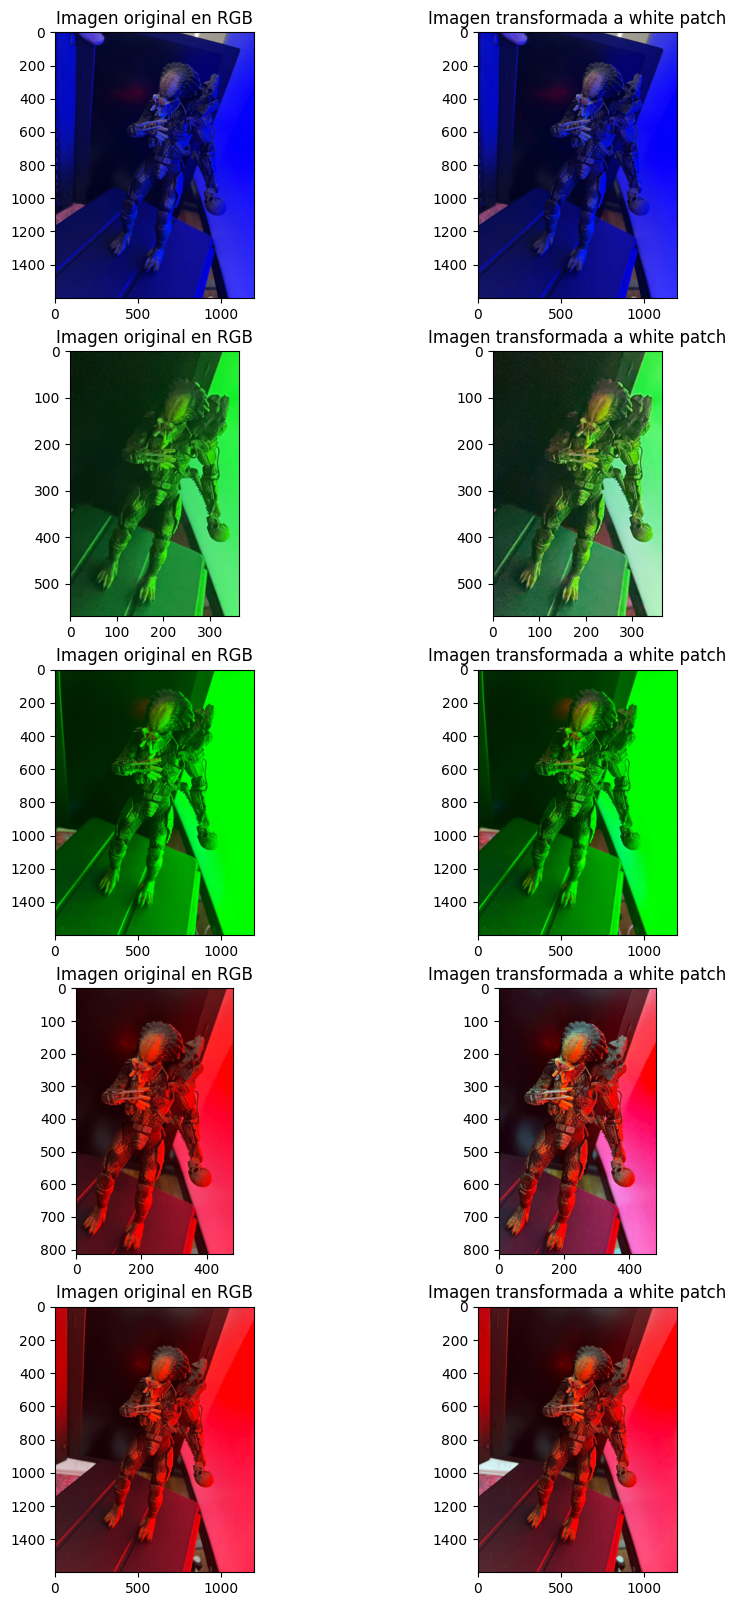

In [5]:
img_TP1 = ['wp_blue.jpg','wp_green.png','wp_green2.jpg','wp_red.png','wp_red2.jpg']
fig, ax = plt.subplots(len(img_TP1),2, figsize=(10,20))
for var in range(len(img_TP1)):
    path_img='./white_patch/' + img_TP1[var]
    #print(path_img)
    imgBGR = cv.imread(path_img)
    imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
    imgCHROM = get_white_patch(imgRGB)
    
    ax[var][0].imshow(imgRGB)
    ax[var][0].set_title('Imagen original en RGB')
    ax[var][1].imshow(imgCHROM)
    ax[var][1].set_title('Imagen transformada a white patch')


Se observan cambios sutiles al aplicar el algortimo de White patch, excepto en las imagenes .jpg que no se observan mayor cambio, se intenta recuperar el color verdadero el resultado no es simular al de test_blue,green,red por las condiciones de iluminacion, para este caso usandolo con percentil se podrian obtener un poco mas de ganancia.

### PARTE 2

### 1- 
Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

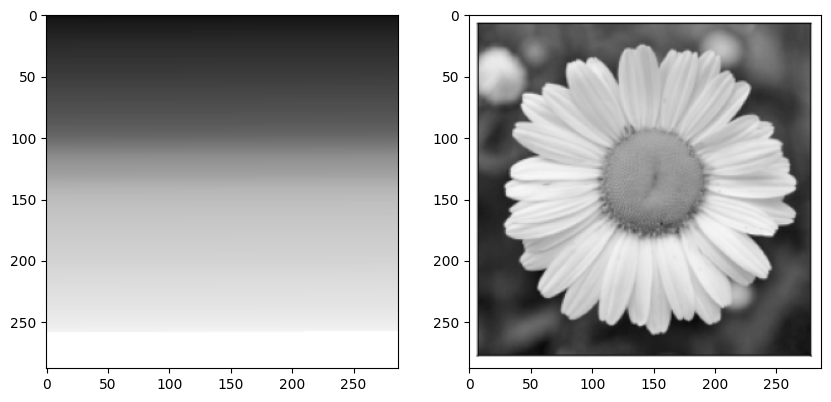

In [6]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

figure, ax = plt.subplots(1, 2,figsize=(10,20))
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

### 2-
Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

Text(0.5, 1.0, 'Hist Imagen1 vs Hist Imagen2 ')

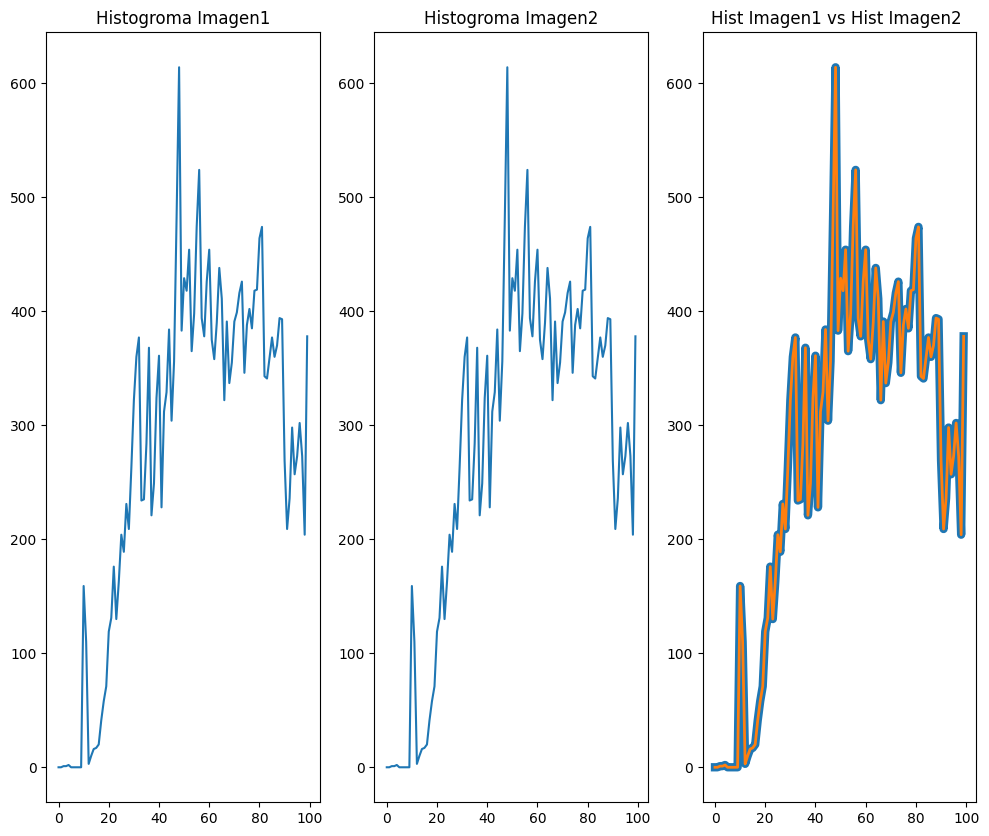

In [7]:
hist1, bins1 = np.histogram(img1.ravel(), 100, [0, 100])
hist2, bins2 = np.histogram(img2.ravel(), 100, [0, 100])
figure, ax = plt.subplots(1, 3, figsize=(12,10))

ax[0].plot(hist1)
ax[0].set_title('Histogroma Imagen1')
ax[1].plot(hist2)
ax[1].set_title('Histogroma Imagen2')
ax[2].plot(hist1,linewidth=6)
ax[2].plot(hist2,linewidth=2)
ax[2].set_title('Hist Imagen1 vs Hist Imagen2 ')

- Como se puede observar en la comparacion de 2 imagenes diferentes se puede obtener un histograma similar.
- Con el histograma podemos ver las caracteristicas o si tuvo algun procesamiento previo, solamente el histograma no lo usaria como feature para entrenar un modelo, tendria que   combinarlo con otra tecnica para poderlo utilizar como feature

### 3- 
Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas

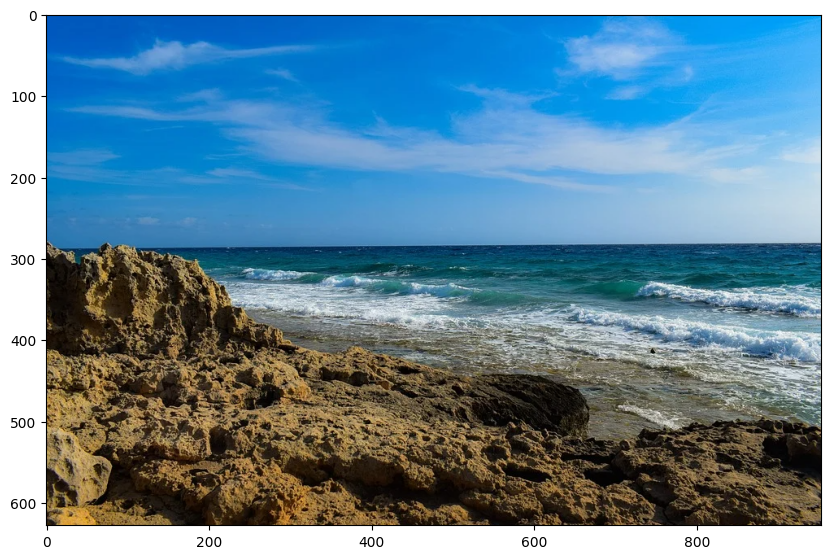

In [8]:
img = cv.imread('segmentacion.png')
plt.figure(figsize=(10, 8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()


Text(0.5, 0.98, 'Histogramas de la Imagen RGB por componentes')

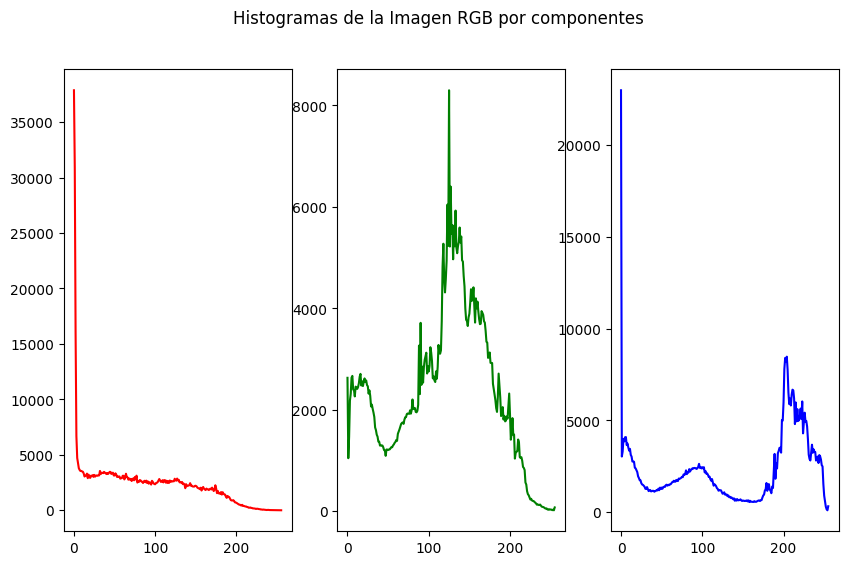

In [9]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize=(10,6))
histoR=cv.calcHist([img_rgb], [0], None, [256], [0, 256])
histoG=cv.calcHist([img_rgb], [1], None, [256], [0, 256])
histoB=cv.calcHist([img_rgb], [2], None, [256], [0, 256])
ax[0].plot(histoR, color='r')
ax[1].plot(histoG, color='g')
ax[2].plot(histoB, color='b')
plt.suptitle('Histogramas de la Imagen RGB por componentes') 

segun el histograma para rojo y azul tenemos una mayor frecuencia en la zona shadow.
Para el color verde la mayor frecuencia aparece en la zona Midtones

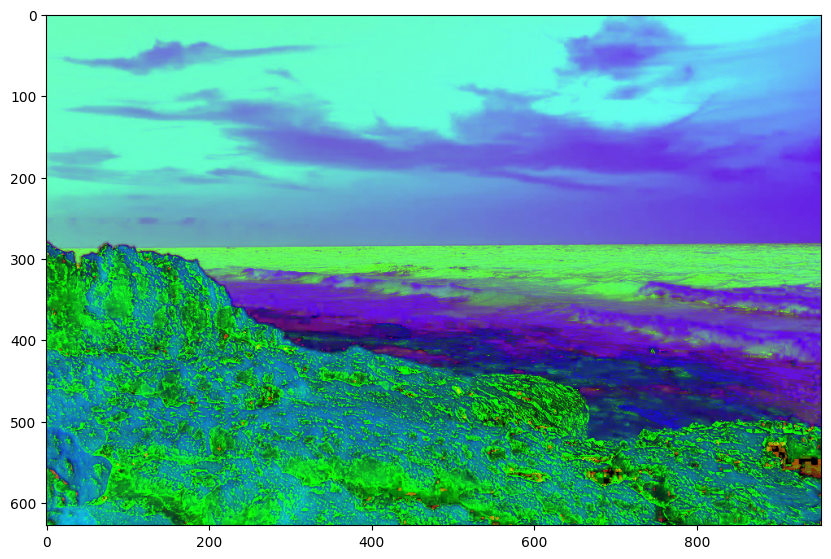

In [10]:
#Imagen en HSV
img_HSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.figure(figsize=(10, 8))
plt.imshow(img_HSV)
plt.show()

Media muestra de agua, [95.91385], [125.394375], [140.063325]
Desvíos muestra de agua:, [9.83581355], [82.28999844], [45.85226183]


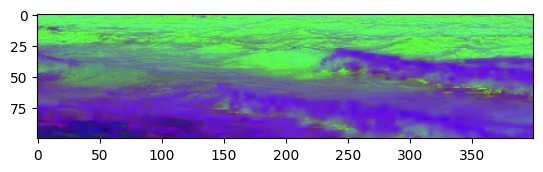

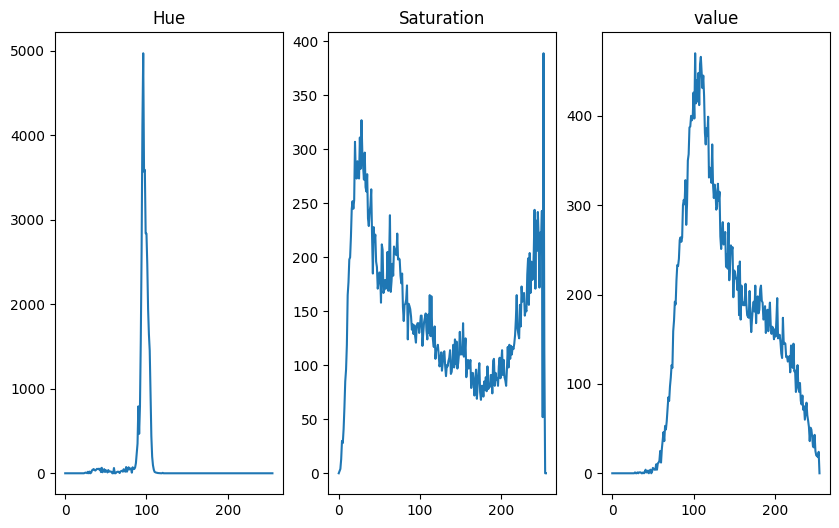

<Figure size 640x480 with 0 Axes>

In [11]:
# segmentacion del Agua sobre una muestra

agua_hsv = img_HSV[300:400, 500:900, :]
hsv_means, hsv_stds = cv.meanStdDev(agua_hsv)
print(f"Media muestra de agua, {hsv_means[0]}, {hsv_means[1]}, {hsv_means[2]}")
print(f"Desvíos muestra de agua:, {hsv_stds[0]}, {hsv_stds[1]}, {hsv_stds[2]}")
plt.figure()
plt.imshow(agua_hsv)
plt.show()

fig, ax = plt.subplots(1, 3,figsize=(10,6))

plt.figure()
ax[0].plot(cv.calcHist([agua_hsv], [0], None, [256], [0, 255])) 
ax[1].plot(cv.calcHist([agua_hsv], [1], None, [256], [0, 255]))
ax[2].plot(cv.calcHist([agua_hsv], [2], None, [256], [0, 255])) 
ax[0].title.set_text('Hue')
ax[1].title.set_text('Saturation')
ax[2].title.set_text('value')
plt.show()


<Figure size 640x480 with 0 Axes>

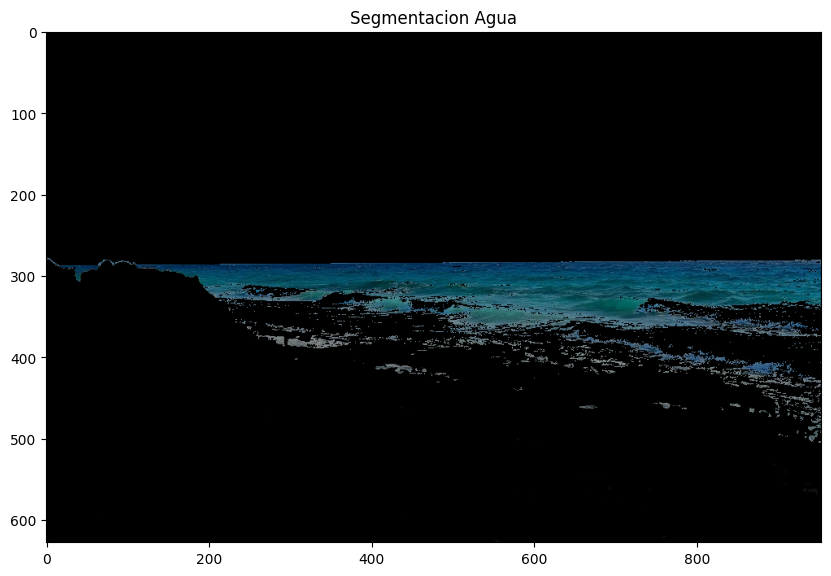

In [22]:
color_l = (86, 0, 0)
color_u = (106, 255, 150)

agua_mask = cv.inRange(img_HSV, color_l, color_u)
agua_segmented = cv.bitwise_and(img, img, mask=agua_mask)

plt.figure()
plt.figure(figsize=(10, 8))
plt.imshow(agua_segmented[..., ::-1])
plt.title('Segmentacion Agua') 
plt.show()

Segmentar cielo

Media muestra de cielo, [103.13180625], [208.2985875], [213.96725625]
Desvíos muestra de cielo:, [1.567999], [58.81912238], [13.53076251]


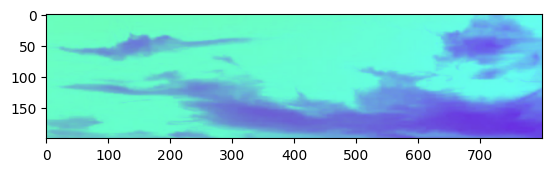

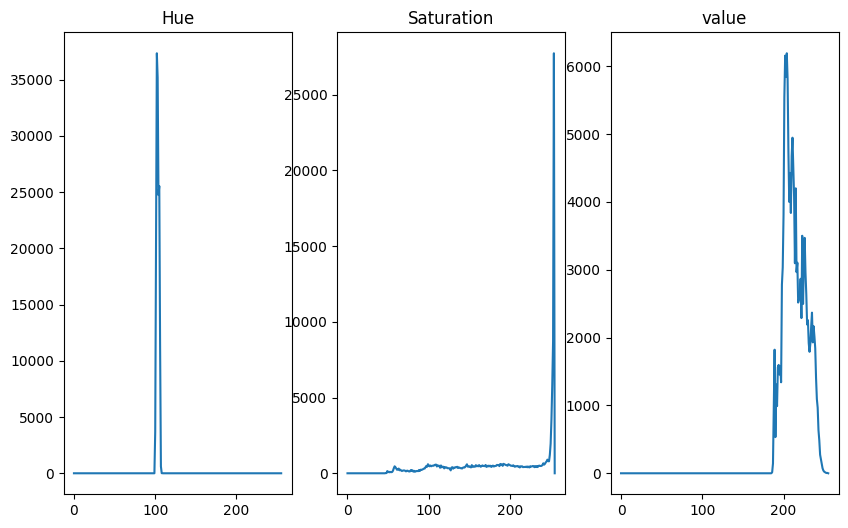

<Figure size 640x480 with 0 Axes>

In [13]:
# segmentacion del cielo sobre una muestra

cielo_hsv = img_HSV[0:200, 0:800, :]
hsv_means, hsv_stds = cv.meanStdDev(cielo_hsv)
print(f"Media muestra de cielo, {hsv_means[0]}, {hsv_means[1]}, {hsv_means[2]}")
print(f"Desvíos muestra de cielo:, {hsv_stds[0]}, {hsv_stds[1]}, {hsv_stds[2]}")
plt.figure()
plt.imshow(cielo_hsv)
plt.show()

fig, ax = plt.subplots(1, 3,figsize=(10,6))

plt.figure()
ax[0].plot(cv.calcHist([cielo_hsv], [0], None, [256], [0, 255])) 
ax[1].plot(cv.calcHist([cielo_hsv], [1], None, [256], [0, 255]))
ax[2].plot(cv.calcHist([cielo_hsv], [2], None, [256], [0, 255])) 
ax[0].title.set_text('Hue')
ax[1].title.set_text('Saturation')
ax[2].title.set_text('value')
plt.show()

<Figure size 640x480 with 0 Axes>

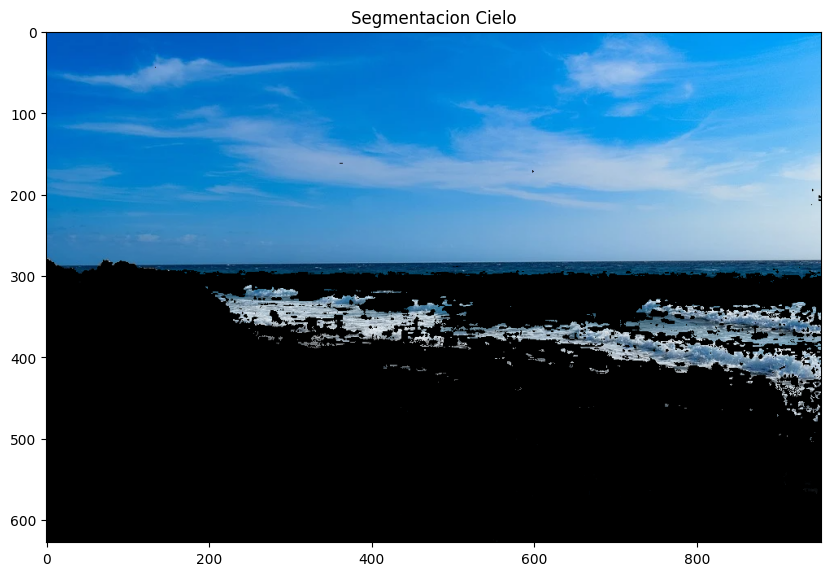

In [14]:
# Aplicar la máscara a la imágen original para segmentar el cielo
#color_l = (86, 58, 87)
#color_u = (106, 220, 173)
color_l = (100, 0, 0)
color_u = (107, 255, 255)

cielo_mask = cv.inRange(img_HSV, color_l, color_u)
cielo_segmented = cv.bitwise_and(img, img, mask=cielo_mask)

plt.figure()
plt.figure(figsize=(10, 8))
plt.imshow(cielo_segmented[..., ::-1])
plt.title('Segmentacion Cielo') 
plt.show()

Segmentar suelo

Media muestra de suelo, [18.8687], [150.22695], [111.87675]
Desvíos muestra de suelo, [14.24673157], [51.09356167], [61.62755357]


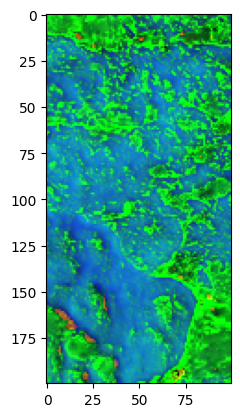

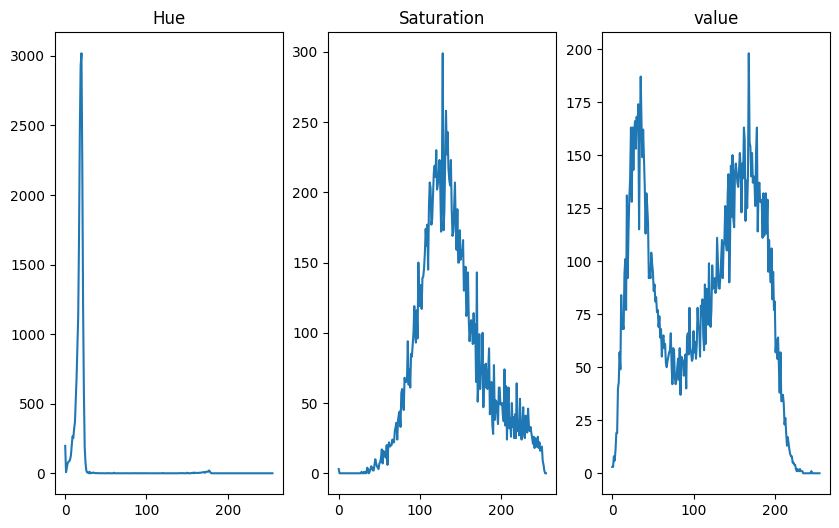

<Figure size 640x480 with 0 Axes>

In [15]:
# segmentacion del suelo sobre una muestra

suelo_hsv = img_HSV[400:600, 0:100, :]
hsv_means, hsv_stds = cv.meanStdDev(suelo_hsv)
print(f"Media muestra de suelo, {hsv_means[0]}, {hsv_means[1]}, {hsv_means[2]}")
print(f"Desvíos muestra de suelo, {hsv_stds[0]}, {hsv_stds[1]}, {hsv_stds[2]}")
plt.figure()
plt.imshow(suelo_hsv)
plt.show()

fig, ax = plt.subplots(1, 3,figsize=(10,6))

plt.figure()
ax[0].plot(cv.calcHist([suelo_hsv], [0], None, [256], [0, 255])) 
ax[1].plot(cv.calcHist([suelo_hsv], [1], None, [256], [0, 255]))
ax[2].plot(cv.calcHist([suelo_hsv], [2], None, [256], [0, 255])) 
ax[0].title.set_text('Hue')
ax[1].title.set_text('Saturation')
ax[2].title.set_text('value')
plt.show()

<Figure size 640x480 with 0 Axes>

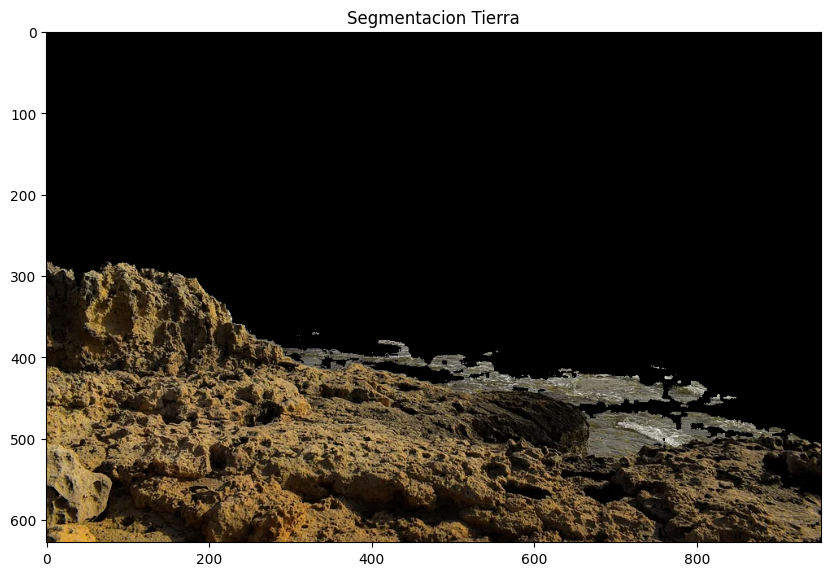

In [16]:
# Aplicar la máscara a la imágen original para segmentar la tierra 

color_l = (4, 0, 0)
color_u = (32, 255, 255)

suelo_mask = cv.inRange(img_HSV, color_l, color_u)
suelo_segmented = cv.bitwise_and(img, img, mask=suelo_mask)

plt.figure()
plt.figure(figsize=(10, 8))
plt.imshow(suelo_segmented[..., ::-1])
plt.title('Segmentacion Tierra') 
plt.show()